In [3]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow.python.framework import ops

from tensorflow.examples.tutorials.mnist import input_data
# Import Fashion MNIST

fashion_mnist = input_data.read_data_sets('input/data', one_hot=True)

Extracting input/data\train-images-idx3-ubyte.gz
Extracting input/data\train-labels-idx1-ubyte.gz
Extracting input/data\t10k-images-idx3-ubyte.gz
Extracting input/data\t10k-labels-idx1-ubyte.gz


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

Using TensorFlow backend.


In [4]:
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))
# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [12]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

y = 3 (Dress)


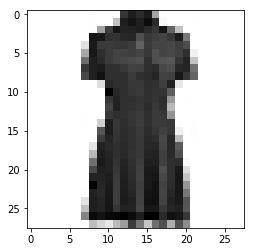

y = 7 (Sneaker)


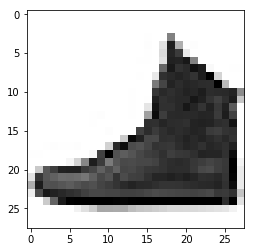

In [15]:
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
sample_label_1 = np.where(fashion_mnist.train.labels[47] == 1)[0][0]
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()
sample_2 = fashion_mnist.train.images[23].reshape(28,28)
sample_label_2 = np.where(fashion_mnist.train.labels[23] == 1)[0][0]
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')

plt.show()

In [16]:
X_train=fashion_mnist.train.images
X_test=fashion_mnist.test.images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (55000, 784)
Testing matrix shape (10000, 784)


In [47]:
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
__________

In [48]:
y_train=fashion_mnist.train.labels
print(y_train.shape)
y_test=fashion_mnist.test.labels
print(y_test.shape)

(55000, 10)
(10000, 10)


In [34]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
55000/55000 [==============================] - 11s - loss: 0.3419 - acc: 0.8738    
Epoch 2/20
55000/55000 [==============================] - 11s - loss: 0.3311 - acc: 0.8793    
Epoch 3/20
55000/55000 [==============================] - 11s - loss: 0.3245 - acc: 0.8803    
Epoch 4/20
55000/55000 [==============================] - 13s - loss: 0.3181 - acc: 0.8833    
Epoch 5/20
55000/55000 [==============================] - 12s - loss: 0.3125 - acc: 0.8849    
Epoch 6/20
55000/55000 [==============================] - 12s - loss: 0.3069 - acc: 0.8881    
Epoch 7/20
55000/55000 [==============================] - 13s - loss: 0.2998 - acc: 0.8892    
Epoch 8/20
55000/55000 [==============================] - 12s - loss: 0.2958 - acc: 0.8892    
Epoch 9/20
55000/55000 [==============================] - 13s - loss: 0.2922 - acc: 0.8921    
Epoch 10/20
55000/55000 [==============================] - 12s - loss: 0.2866 - acc: 0.8943    
Epoch 11/20
55000/55000 [========================

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3376146227
Test accuracy: 0.8851


In [50]:
import time
start = time.time()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model_info = model.fit(X_train, y_train, batch_size=128,epochs=10, verbose=2,validation_split=0.2)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))

Train on 44000 samples, validate on 11000 samples
Epoch 1/10
9s - loss: 1.0232 - acc: 0.6242 - val_loss: 0.6565 - val_acc: 0.7540
Epoch 2/10
8s - loss: 0.6245 - acc: 0.7660 - val_loss: 0.5577 - val_acc: 0.7955
Epoch 3/10
8s - loss: 0.5424 - acc: 0.8033 - val_loss: 0.5062 - val_acc: 0.8127
Epoch 4/10
8s - loss: 0.4939 - acc: 0.8212 - val_loss: 0.4950 - val_acc: 0.8176
Epoch 5/10
8s - loss: 0.4595 - acc: 0.8324 - val_loss: 0.4490 - val_acc: 0.8321
Epoch 6/10
8s - loss: 0.4332 - acc: 0.8415 - val_loss: 0.4159 - val_acc: 0.8479
Epoch 7/10
9s - loss: 0.4147 - acc: 0.8493 - val_loss: 0.4156 - val_acc: 0.8505
Epoch 8/10
9s - loss: 0.4000 - acc: 0.8535 - val_loss: 0.3936 - val_acc: 0.8576
Epoch 9/10
8s - loss: 0.3861 - acc: 0.8590 - val_loss: 0.4015 - val_acc: 0.8560
Epoch 10/10
8s - loss: 0.3728 - acc: 0.8645 - val_loss: 0.3815 - val_acc: 0.8623
Model took 89.11 seconds to train


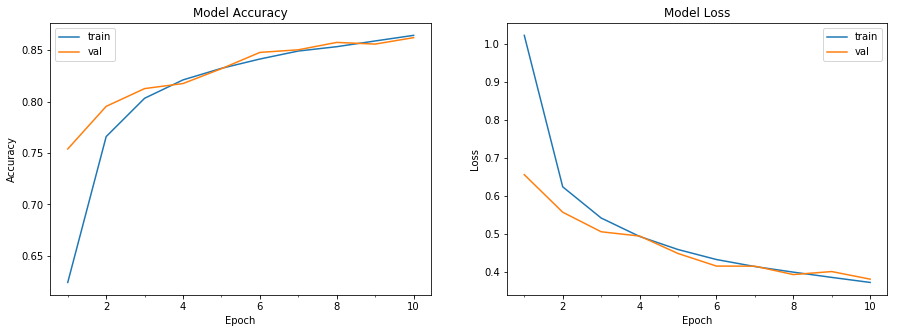

In [51]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
plot_model_history(model_info)

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.403192398119
Test accuracy: 0.8528
